In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

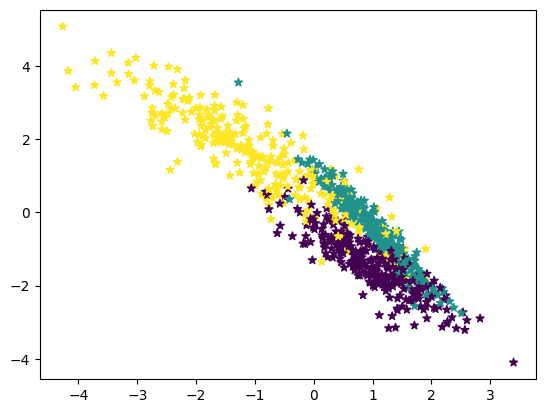

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [4]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [6]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


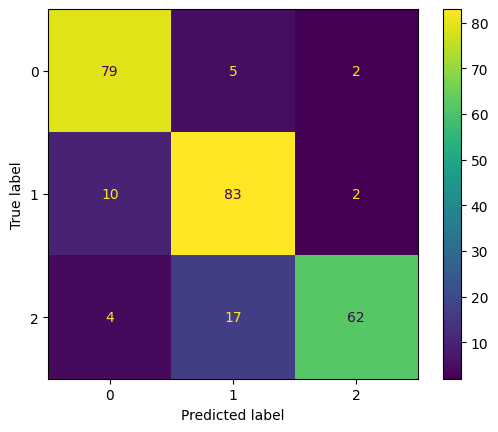

In [7]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [9]:
import pandas as pd


df = pd.read_csv('car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


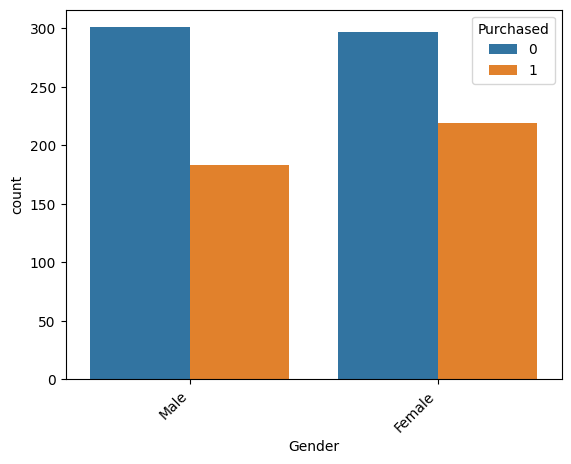

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Gender', hue='Purchased')  # Replace 'purpose' with an existing column
plt.xticks(rotation=45, ha='right');

In [13]:
# Check if the column 'purpose' exists in the dataframe
if 'purpose' in df.columns:
	pre_df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
	pre_df.head()
else:
	print("The column 'purpose' does not exist in the dataframe.")

The column 'purpose' does not exist in the dataframe.


In [15]:
from sklearn.model_selection import train_test_split

# Check if pre_df is defined
if 'pre_df' in locals():
    X = pre_df.drop('not.fully.paid', axis=1)
    y = pre_df['not.fully.paid']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=125
    )
else:
    print("Error: 'pre_df' is not defined. Ensure the 'purpose' column exists in the dataframe and preprocess it before running this cell.")

Error: 'pre_df' is not defined. Ensure the 'purpose' column exists in the dataframe and preprocess it before running this cell.


In [16]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

In [17]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


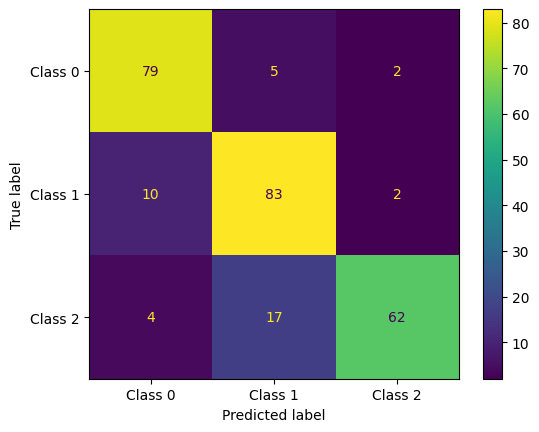

In [19]:
labels = ["Class 0", "Class 1", "Class 2"]  # Update labels to match the number of classes
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();